<a href="https://colab.research.google.com/github/PrachitiSParulekar/machine-learning-end-to-end-pipeline/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
!pip install ucimlrepo

In [26]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [29]:
print("Features (X):")
display(X.head())

Features (X):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [30]:
print("\nTargets (y):")
display(y.head())


Targets (y):


,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [31]:
print("\nInfo on Features (X):")
X.info()
print("\nInfo on Targets (y):")
y.info()


Info on Features (X):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null   

In [32]:
# Binary classification target: 1=Pass (G3 >= 10), 0=Fail (G3 < 10)
y['pass'] = (y['G3'] >= 10).astype(int)

# Drop G1, G2, G3 from features if you don't want to leak info
X_model = X.copy()
X_model = X_model.drop(['school', 'sex', 'address', 'famsize', 'Pstatus',
                        'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                        'higher', 'internet', 'romantic'], axis=1, errors='ignore')

# Use one-hot encoding for categorical columns in original X (if any)
X_ready = pd.get_dummies(X)

# Target variable for modeling
y_ready = y['pass']

print("Prepared features shape:", X_ready.shape)
print("Prepared target shape:", y_ready.shape)



Prepared features shape: (649, 56)
Prepared target shape: (649,)


/tmp/ipython-input-312770661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['pass'] = (y['G3'] >= 10).astype(int)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_ready, y_ready, test_size=0.2, random_state=42
)

# Train Decision Tree (using entropy & max_depth=5 for demonstration)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [34]:
# Prediction and evaluation
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[  4  11]
 [  7 108]]
Accuracy: 0.8615384615384616
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.91      0.94      0.92       115

    accuracy                           0.86       130
   macro avg       0.64      0.60      0.62       130
weighted avg       0.84      0.86      0.85       130



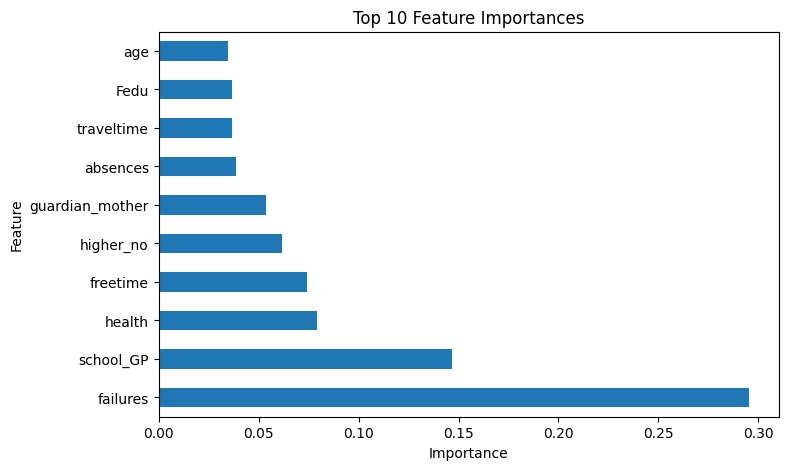

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importances
feat_importance = pd.Series(clf.feature_importances_, index=X_ready.columns)
top_features = feat_importance.nlargest(10)

# Plot top 10 features
plt.figure(figsize=(8, 5))
top_features.plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

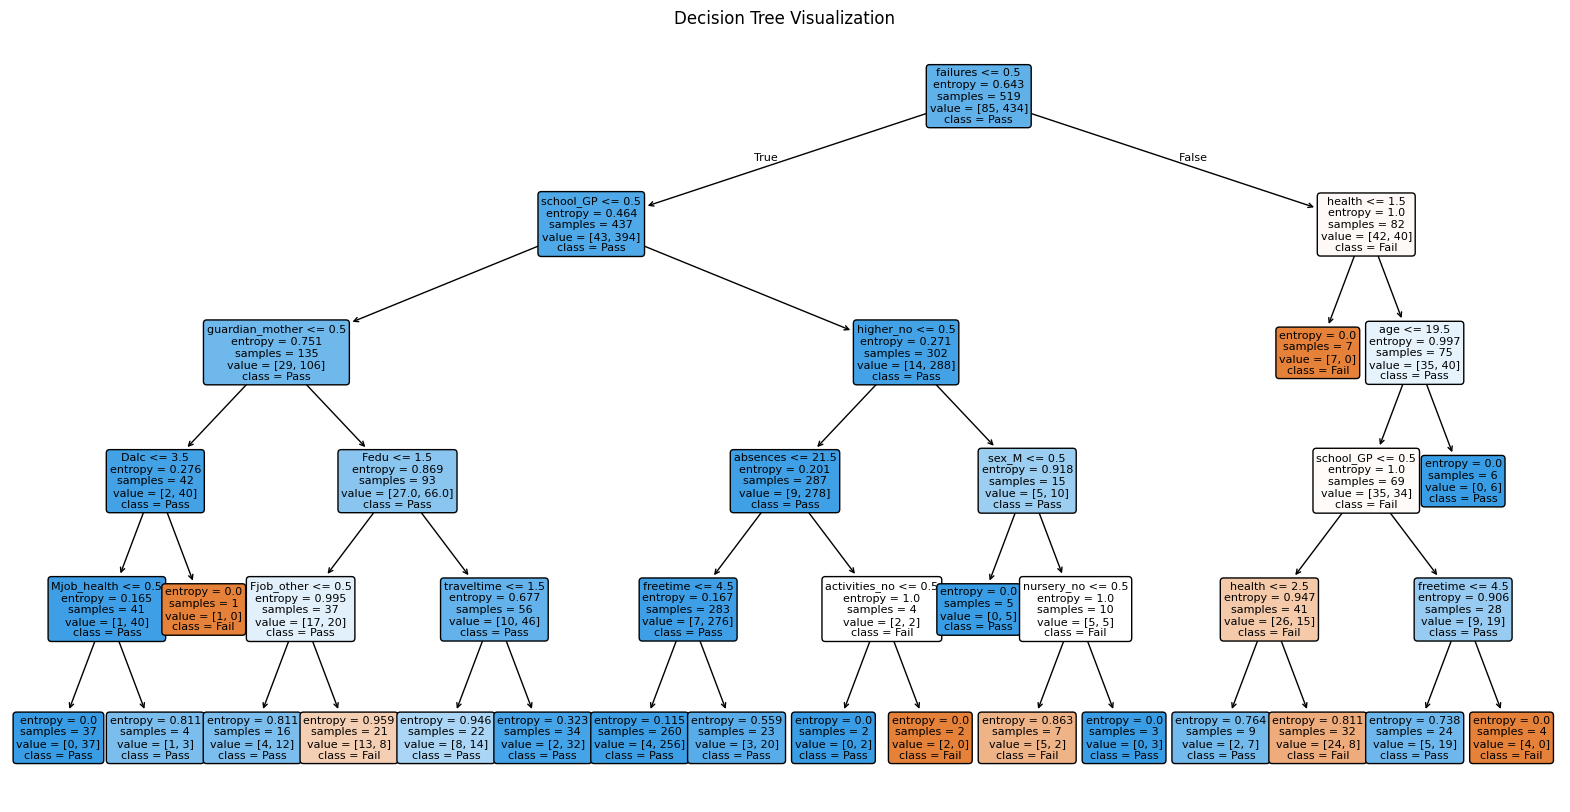

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X_ready.columns,
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title('Decision Tree Visualization')
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation accuracy
cv_scores = cross_val_score(clf, X_ready, y_ready, cv=10, scoring='accuracy')
print('Cross-validation scores:', cv_scores)
print('Mean CV accuracy:', cv_scores.mean())

Cross-validation scores: [0.86153846 0.84615385 0.8        0.84615385 0.84615385 0.86153846
 0.87692308 0.72307692 0.76923077 0.84375   ]
Mean CV accuracy: 0.8274519230769231


In [38]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validated Accuracy:", grid_search.best_score_)

# Use the best estimator for predictions
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
print("Accuracy with Best Estimator:", accuracy_score(y_test, y_pred_best))
print("Classification Report (Best Estimator):\n", classification_report(y_test, y_pred_best))

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-validated Accuracy: 0.8613330843913369
Accuracy with Best Estimator: 0.8769230769230769
Classification Report (Best Estimator):
               precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.91      0.96      0.93       115

    accuracy                           0.88       130
   macro avg       0.68      0.61      0.63       130
weighted avg       0.86      0.88      0.86       130



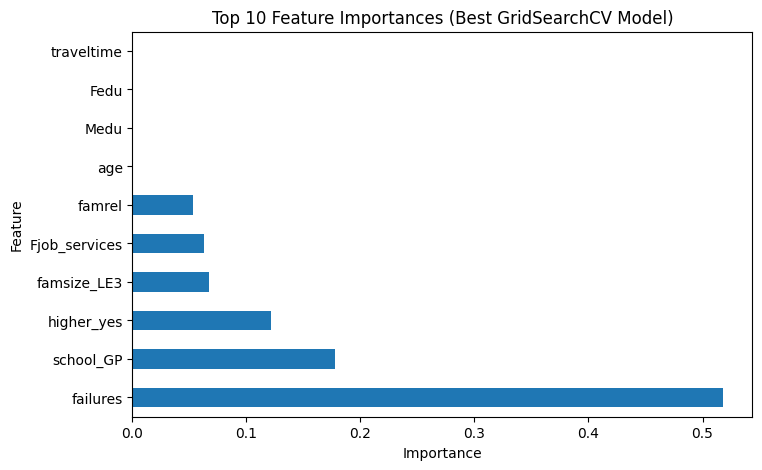

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best estimator
feat_importance_best = pd.Series(best_clf.feature_importances_, index=X_ready.columns)
top_features_best = feat_importance_best.nlargest(10)

plt.figure(figsize=(8, 5))
top_features_best.plot(kind='barh')
plt.title('Top 10 Feature Importances (Best GridSearchCV Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
